In [41]:
#Import pandas, numpy

In [42]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [43]:
# Import matplotlib, seaborn 

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# Import data

In [119]:
df = pd.read_csv("Test Movie.csv")
df.head(2)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [120]:
df1 = df.drop(df.columns[0],axis=1)
df1.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [48]:
# Now check dtype each columns

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 2.0+ MB


In [50]:
# Check the null value

In [51]:
df1.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [121]:
# Because "Rotten Tomatoes" have very much NaN so we should drop this feature
df = df.drop(["Unnamed: 0","Rotten Tomatoes"], axis =1)
df.head(2)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [122]:
# "Age" columns have a lot of NaN, but because of important so we will fill NaN to Compling each countries 
df1["Age"] = df1["Age"].fillna("Customize countries")
df1.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [132]:
# "Directors","Genres","Country","Language","IMDb" we don't know, so I think we should
df["IMDb"] = df["IMDb"].dropna()
df["Genres"] = df["Genres"].dropna()
df["Directors"] = df["Directors"].dropna()
df["Country"] = df["Country"].dropna()
df["Language"] = df["Language"].dropna()
# With runtime, I think we need to get the value equal to previous value
df["Runtime"] = df["Runtime"].fillna(method = 'pad')
df.head(2)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [138]:
# Next, we wanna create "Channel" include "Netflix","Hulu","Prime Video","Disney+"
df1 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb","Directors","Genres","Country","Language","Runtime"],var_name="Channel",value_vars=["Netflix","Hulu","Prime Video","Disney+"],value_name="Value")
df1.head(5)

,ID,Title,Year,Age,IMDb,Directors,Genres,Country,Language,Runtime,Channel,Value
0,1,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix,1
1,2,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix,1
2,3,Avengers: Infinity War,2018,13+,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Netflix,1
3,4,Back to the Future,1985,7+,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix,1


In [143]:
# However, if we do that, the number of title will repeat four times, so we should have a condition to filter
filter_Netflix = df1[(df1["Value"] == 1) & (df1["Channel"] == "Netflix")]

In [152]:
filter_Disney = df1[(df1["Value"] == 1) & (df1["Channel"] == "Disney+")]

In [155]:
filter_PrimeVideo = df1[(df1["Value"] == 1) & (df1["Channel"] == "Prime Video")]

In [156]:
filter_Hulu = df1[(df1["Value"] == 1) & (df1["Channel"] == "Hulu")]

In [169]:
# Compare filter_Netflix and df2
print (filter_Netflix.shape)
print (df.shape)
# We have filtered some data isn't equal Netflix

(3560, 12)
(16744, 15)


In [175]:
# We join 4 dataframe to joint df
frames = [filter_Netflix,filter_Disney,filter_PrimeVideo,filter_Hulu]
df_join=pd.concat(frames)
df_join.head(5)

,ID,Title,Year,Age,IMDb,Directors,Genres,Country,Language,Runtime,Channel,Value
0,1,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix,1
1,2,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix,1
2,3,Avengers: Infinity War,2018,13+,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Netflix,1
3,4,Back to the Future,1985,7+,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix,1


# ANALYTICS INSIGHT AND PROBLEMS

In [215]:
# Now we have some questions:
# 1/ Which channel is more popular by the time?
# 2/ The distribution between IMDb & Channel, Runtime ?
# 3/ Show top 30 movies on Netflix by IMDb ?
# 4/ Compare the number of movies on all channels ?
# 5/ Show top 5 genres have a best average rating (IMDb) ?

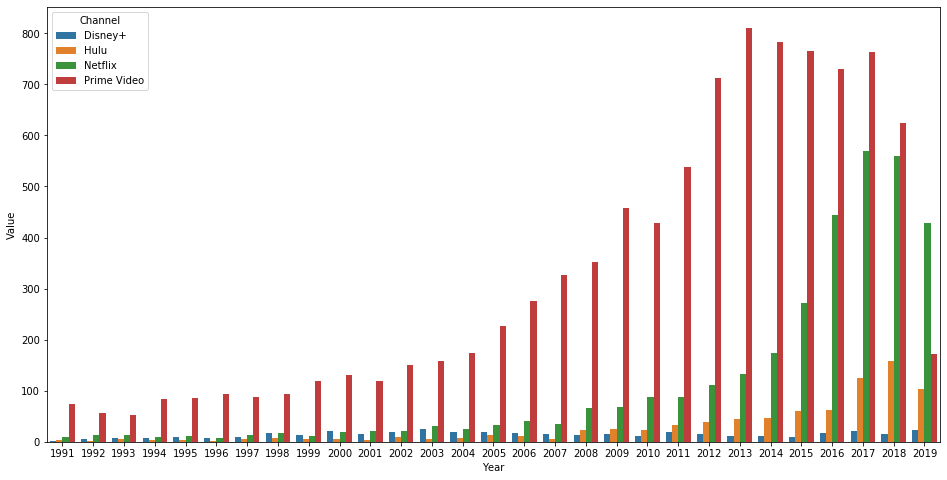

In [222]:
1/ Which channel is more popular by the time?
# We must group by number of movies with year and channel
groupby = df_join.groupby([df_join.Year,df_join.Channel]).sum().reset_index()
groupby.head(2)
# Show Chart
plt.figure(figsize=(16,8))
groupby = groupby[(groupby.Year>1990) & (groupby.Year<2020)]
sns.barplot(x = "Year",y = "Value", hue ="Channel", data = groupby)
plt.show()

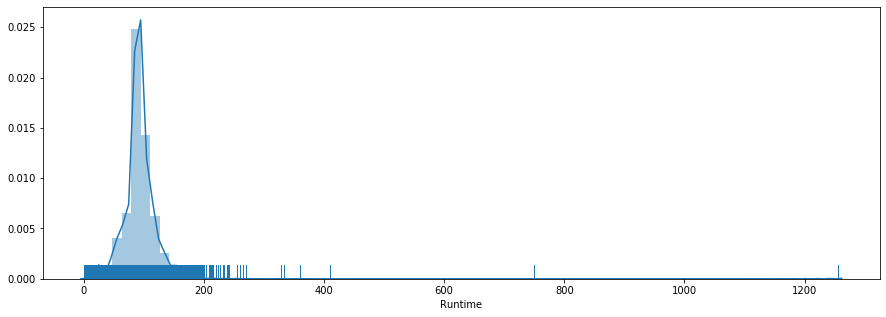

In [208]:
# 2/ The distribution between IMDb & Channel, Runtime ?
plt.figure(figsize=(15,5))
sns.distplot(df2["Runtime"], bins =80, rug = True)
plt.show()

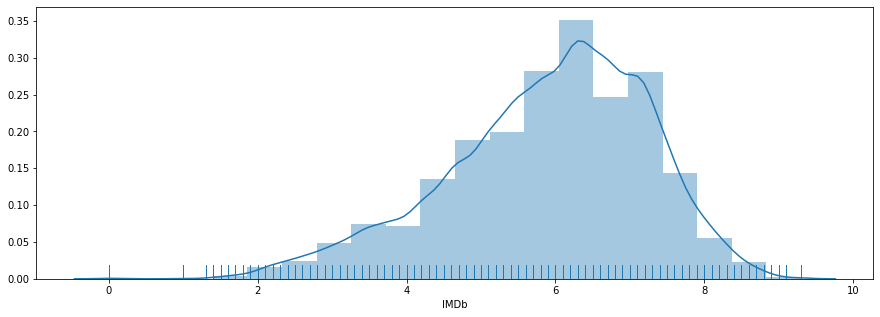

In [209]:
plt.figure(figsize=(15,5))
sns.distplot(df2["IMDb"], bins =20, rug = True)
plt.show()

In [210]:
# Seperated_genres 
seperated_genres= df2["Genres"].str.split(',',expand = True)
dataset = pd.concat([df2, seperated_genres], axis = 1, sort = False)
df2.head(2)

,ID,Title,Year,Age,IMDb,Directors,Genres,Country,Language,Runtime,Channel,Value
0,1,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix,1
1,2,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix,1


C:\Users\tri\anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Text(0.5, 1, 'Top 30 movies by IMDb')

<Figure size 1080x720 with 0 Axes>

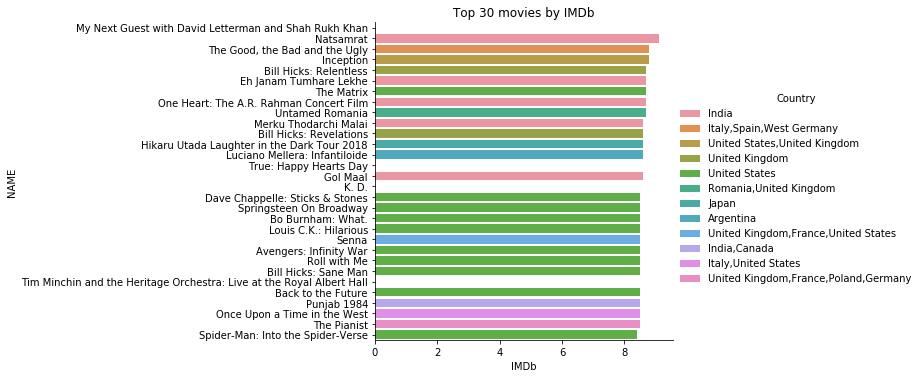

In [217]:
# 3/ Show top 30 movies on Netflix by IMDb
# Show top 30 movies on Netflix by IMDb
top_30_Netflix = netflix_movies.sort_values(by = "IMDb", ascending = False).head(30)
# Show it by seaborn
plt.figure(figsize =(15,10))
sns.catplot(x="IMDb", y="Title",kind="bar", hue ="Country",dodge = False, data = top_30_Netflix)
plt.xlabel('IMDb')
plt.ylabel('NAME')
plt.title('Top 30 movies by IMDb')

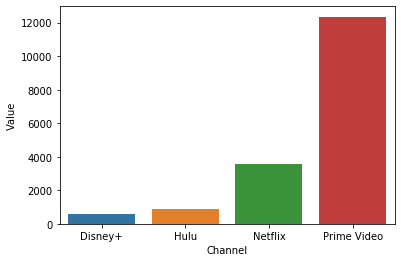

In [228]:
# 4/ Compare the number of movies on all channels ?
# Group by value with channel
sum = df_join.groupby("Channel").sum().reset_index()
sum.head(2)
# Show chart
sns.barplot(x="Channel",y="Value",data = sum)

In [233]:
# 5/ Show top 5 genres have a best average rating (IMDb)
# Check number of each genres
df_join['Genres'].value_counts().head(5)

Drama           1375
Documentary     1250
Comedy          1084
Comedy,Drama     469
Horror           443
Name: Genres, dtype: int64

In [253]:
# Show top 5 top genres by average IMDb
top_5_genres = ['Drama','Documentary','Comedy', 'Comedy,Drama','Horror']
table = dataset.loc[:,['Year','Genres','IMDb']]
table['AvgRating'] = table.groupby([table.Genres,table.Year])['IMDb'].transform('mean')
table = table[(table.Year>2009) & (table.Year<2020)]
table = table.loc[table['Genres'].isin(top_5_genres)]
table = table.sort_values('Year')

In [255]:
table.head(5)

,Year,Genres,IMDb,AvgRating
10806,2010,Documentary,7.7,6.759615
57728,2010,Documentary,8.2,6.759615
57680,2010,Documentary,7.7,6.759615
57672,2010,Documentary,6.5,6.759615
17598,2010,Drama,7.0,6.141860


In [256]:
top_5_genres = table.sort_values(by = "AvgRating", ascending = False).head(5)
top_5_genres

,Year,Genres,IMDb,AvgRating
11291,2015,Documentary,6.9,6.878873
31249,2015,Documentary,6.3,6.878873
64423,2015,Documentary,7.0,6.878873
31171,2015,Documentary,7.4,6.878873
2188,2015,Documentary,7.2,6.878873
